In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#파일 불러오기
#독일 외 국가 사용.

original_df = pd.read_csv("C:/Users/USER/Desktop/씹중만/코딩/데브코스/프로젝트/프로젝트3_ml만들기/Bank Customer Churn Prediction.csv")
df = original_df[original_df['country']!='Germany']
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [10]:
df.groupby('churn').count()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,,,,
0,6268,6268,6268,6268,6268,6268,6268,6268,6268,6268,6268
1,1223,1223,1223,1223,1223,1223,1223,1223,1223,1223,1223


## 1. 데이터 전처리
* gender, country 숫자형태로 변경
* products_number 4번 빼고 진행

### 1-1.gender, country 숫자형태로 변경

In [3]:
# France = 0, Spain = 1
enc = LabelEncoder()
enc.fit(df['country'])
enc_country = enc.transform(df['country'])
df['country'] = enc_country 

# Female = 0, Male =1
enc.fit(df['gender'])
enc_gender = enc.transform(df['gender'])
df['gender'] = enc_gender

C:\Users\USER\AppData\Local\Temp\ipykernel_5320\4138301940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = enc_country
C:\Users\USER\AppData\Local\Temp\ipykernel_5320\4138301940.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = enc_gender


In [4]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,15719294,800,0,0,29,2,0.00,2,0,0,167773.55,0
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1


### 1-2.products_number 4번 제외

In [5]:
#PN 4번 제외용 데이터 복사
df_pn = df.copy()
df_pn = df_pn[df_pn['products_number']!=4]
df_pn

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,15719294,800,0,0,29,2,0.00,2,0,0,167773.55,0
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1


## 2. LogisticRegression 머신러닝 생성 - Products 4번 제외

In [6]:
# LogisticRegression 라이브러리 생성
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
# 테스트용과 트레이닝용 데이터 분리.
# customer_id는 제외
X=df_pn[['credit_score','credit_card','country','gender','age','tenure','balance','products_number','active_member','estimated_salary']]
y=df_pn['churn']


# #일반 샘플링
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#계층적 샘플링
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

In [8]:
#train 데이터 스케일링 진행
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_minmax = scaler.transform(X_train)

In [9]:
# LogisticRegression모델 생성
lr = LogisticRegression()

log_reg = lr.fit(X_train_minmax, y_train)

### 2-1. LogisticRegression 모델 평가

In [10]:
from sklearn.metrics import classification_report

#평가(test) 데이터 스케일링 처리
X_test_minmax = scaler.transform(X_test)

expected = y_test
predicted = log_reg.predict(X_test_minmax)

report = classification_report(expected, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1254
           1       0.68      0.09      0.16       237

    accuracy                           0.85      1491
   macro avg       0.76      0.54      0.54      1491
weighted avg       0.82      0.85      0.80      1491



* 평가 진행시 churn의 클래스 1에 recall이 전혀 이뤄지지 않았다.

## 3. LogisticRegression 머신러닝 생성 - Products 4번 포함

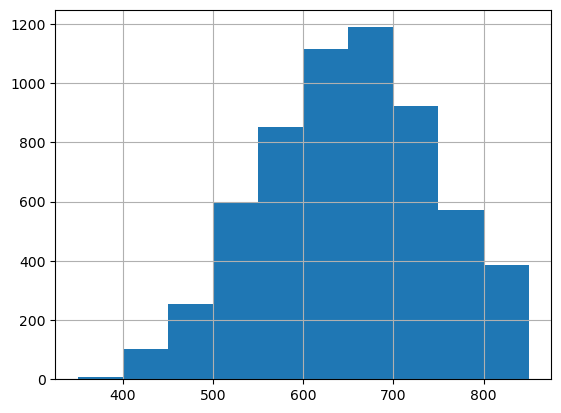

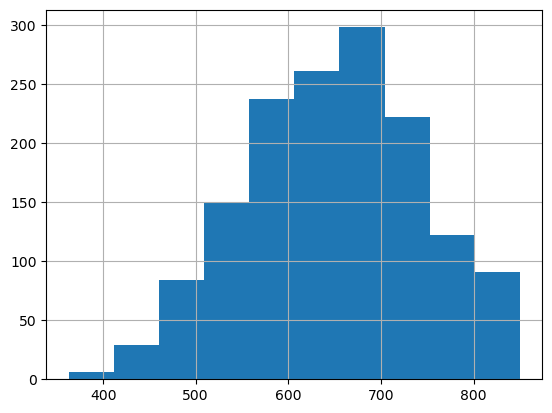

In [11]:
# 테스트용과 트레이닝용 데이터 분리.
# customer_id는 제외
X4=df[['credit_score','country','gender','age','tenure','balance','products_number','active_member','estimated_salary','credit_card']]
y4=df['churn']

# #일반 샘플링
# X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4, test_size=0.2)


#계층적 샘플링
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X4, y4):
    X_train4 = X4.iloc[train_index]
    y_train4 = y4.iloc[train_index]
    X_test4 = X4.iloc[test_index]
    y_test4 = y4.iloc[test_index]

X_train4['credit_score'].hist()
plt.show()
X_test4['credit_score'].hist()
plt.show()

In [12]:
#train 데이터 스케일링 진행
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train4)
X_train_minmax = scaler.transform(X_train4)

In [13]:
# LogisticRegression모델 생성
lr = LogisticRegression()

log_reg = lr.fit(X_train_minmax, y_train4)

### 3-1. LogisticRegression 모델 평가

In [14]:
from sklearn.metrics import classification_report

#평가(test) 데이터 스케일링 처리
X_test_minmax = scaler.transform(X_test4)

expected = y_test4
predicted = log_reg.predict(X_test_minmax)

report = classification_report(expected, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1254
           1       0.70      0.11      0.20       245

    accuracy                           0.85      1499
   macro avg       0.78      0.55      0.56      1499
weighted avg       0.83      0.85      0.80      1499



Product 4번을 포함한 결과를 살펴보면 f1-score가 약간 더 좋은 모습을 볼 수 있다.

## 4.Decision Tree 모델 생성

### 4-1. 적합한 max_depth 찾기. 

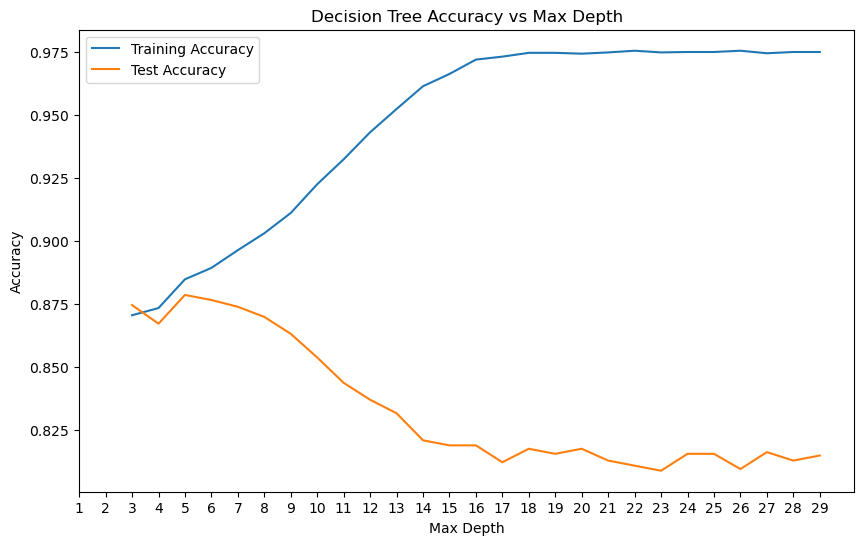

In [15]:
#라이브러리 생성
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# max depth에 따른 학습 결과 경향성 파악
max_depths = range(3, 30)

train_accuracies = []
test_accuracies = []

for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=5)
    tree.fit(X_train, y_train)

    # 학습 데이터에 대한 정확도
    y_train_pred = tree.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # 평가 데이터에 대한 정확도
    y_test_pred = tree.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.xticks(range(1,30))
plt.show()

max_depth는 5가 가장 적합해 보인다.

### 4-2.Decision Tree 모델 생성

In [26]:
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=5,class_weight='balanced')
model = tree.fit(X_train, y_train)


### 4-3. Decision Tree 모델 평가

In [23]:
predicted = model.predict(X_test)

report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1254
           1       0.43      0.70      0.54       237

    accuracy                           0.81      1491
   macro avg       0.69      0.76      0.71      1491
weighted avg       0.86      0.81      0.82      1491



* 이전 LogisticRegression모델보다 전체적으로 성능이 높아진 것을 볼 수 있다.